In [3]:
!pip install quandl

In [4]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [5]:
quandl.ApiConfig.api_key = 'zZzhwTNJ1Z8SxApaAd8K'

df = quandl.get("WIKI/AMZN")
df = df[['Adj. Close']]
df

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


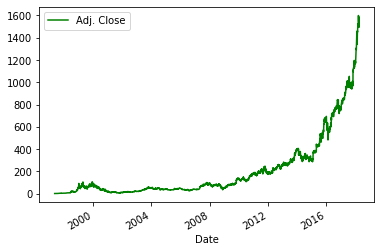

In [6]:
df['Adj. Close'].plot(color='g')
plt.legend(loc='upper left')
plt.show()

In [7]:
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)

forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[1498.8529099  1537.65481291 1549.02778448 1535.14872394 1556.02571937
 1571.49763307 1573.45153295 1589.63492107 1612.94367233 1602.35650832
 1602.85560231 1582.67946227 1589.9003966  1614.70642983 1629.6049164
 1637.42051591 1644.70516437 1673.40837833 1694.11546943 1683.27344891
 1686.26801285 1677.05070256 1665.75206414 1637.34618276 1681.50007239
 1676.56222759 1636.46480401 1584.92007571 1648.9527728  1586.50230985]


(736445.0, 737192.5)

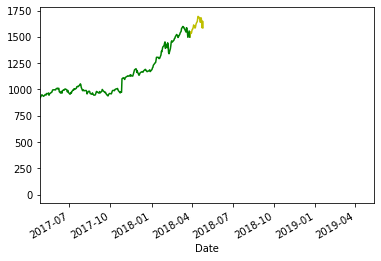

In [9]:
dates = pd.date_range(start="2018-03-28", end="2018-04-26")
plt.plot(dates, forecast_predicted, color='y')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017,4,26))